In [2]:
import pandas as pd
import numpy as np
import sys
import pickle
import seaborn as sns

import matplotlib.pyplot as plt

ANALYSIS_DATA_FOLDER = 'analysis_data/'

In [3]:
books_df = pd.read_pickle(ANALYSIS_DATA_FOLDER + 'books')
review_books_df = pd.read_pickle(ANALYSIS_DATA_FOLDER + 'review_books')
very_similars = pd.read_pickle(ANALYSIS_DATA_FOLDER + 'very_similars')

In [3]:
books_df.shape

(1611, 9)

In [110]:
books_df.head()

,title,description,imUrl,authors,isbn,eisbn,brand,edition,publisher
asin,,,,,,,,,
0470769327,feng shui for dummies,Packed with up-to-date practices to bring Feng...,http://ecx.images-amazon.com/images/I/515wjGHF...,[david daniel kennedy],0470769327,None,Brand: For Dummies,2nd Edition,John Wiley & Sons
0767903927,instant emotional healing acupressure for the ...,Drawing on techniques ranging from focused tho...,http://ecx.images-amazon.com/images/I/51ds0tXv...,"[george pratt, peter lambrou]",0767903927,None,Brand: Boadway Books,1,Harmony
0240802756,light science and magic an introduction to pho...,'This is the first book I have seen on photogr...,http://ecx.images-amazon.com/images/I/41OIZRCx...,"[fil hunter, steven biver, paul fuqua]",0240802756,None,Brand: Focal Press,2,Focal Press
0743292464,the ultimate battle okinawa 1945the last epic ...,"""Bill Sloan's The Ultimate Battle is the Okina...",http://ecx.images-amazon.com/images/I/51GtzEH%...,[bill sloan],0743292464,None,Brand: Simon n Schuster,1st Simon & Schuster Hardcover Ed,S & S International
144211892X,the voodoo hoodoo spellbook,Denise Alvarado was born and raised in the Voo...,http://ecx.images-amazon.com/images/I/51hRBd5B...,[denise alvarado],144211892X,None,None,None,Createspace


In [111]:
review_books_df.shape

(132307, 3)

In [132]:
review_books_df.head()

,asin,overall,unixReviewTime
26822,0006531237,5.0,2013-12-05
26823,0006531237,4.0,2011-10-30
26824,0006531237,5.0,2013-03-22
26825,0006531237,5.0,2014-01-05
26826,0006531237,5.0,2014-02-24


#### Distribution des notes

In [169]:
review_total = len(review_books_df)
review_total

132307

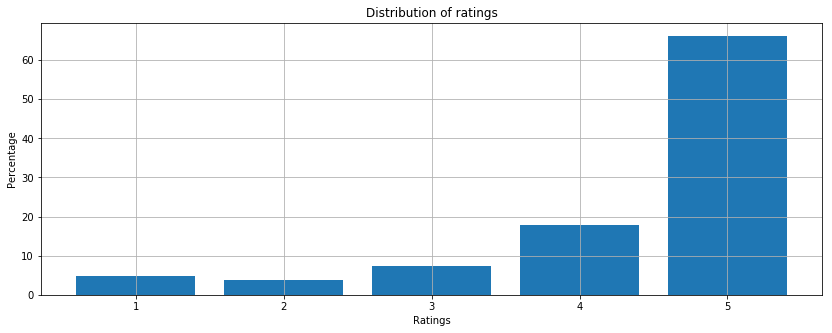

In [295]:
distribution = review_books_df.groupby('overall')[['asin']].count()*100/review_total

distribution.columns = ['percentage']
plt.figure(figsize=(14,5))
plt.bar(distribution.index.values, distribution.values, align='center')
plt.title('Distribution of ratings')
plt.xlabel('Ratings')
plt.ylabel('Percentage')
plt.grid()
plt.show()

#### Evolution des notes dans le temps

In [296]:
review_books_df.sort_values(by='unixReviewTime').head()

,asin,overall,unixReviewTime
4425969,0385260954,5.0,1997-07-20
4410489,0385006896,5.0,1997-08-12
2079807,0261103288,5.0,1997-08-15
7389520,0671016865,5.0,1997-08-16
1669031,0142800376,5.0,1997-08-18


In [297]:
review_books_df.iloc[0].unixReviewTime.year

2013

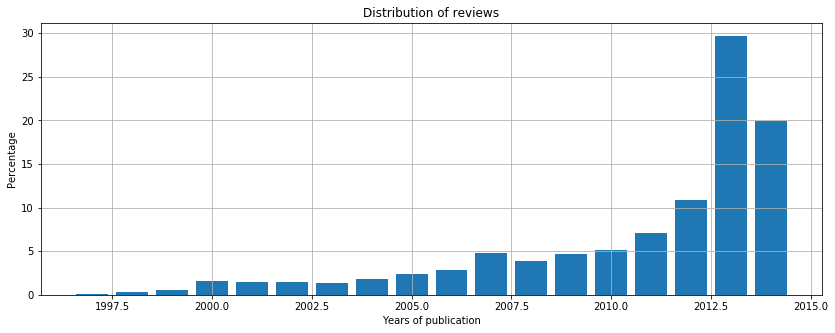

In [298]:
distribution = review_books_df.groupby(review_books_df['unixReviewTime'].apply(lambda x: x.year)).count()*100/review_total

plt.figure(figsize=(14,5))
plt.bar(distribution.index.values, distribution['asin'].values, align='center')
plt.title('Distribution of reviews')
plt.xlabel('Years of publication')
plt.ylabel('Percentage')
plt.grid()
plt.show()

In [343]:
distribution_std = review_books_df.groupby(review_books_df['unixReviewTime'].apply(lambda x: x.year)).std()
distribution_count = review_books_df.groupby(review_books_df['unixReviewTime'].apply(lambda x: x.year)).count()
distribution_err = distribution_std

for index, row in distribution_std.iterrows():
    distribution_err.loc[index].err = 2*distribution_std.loc[index].overall/np.sqrt(distribution_count.loc[index].overall)

distribution_err.tail()

,overall,err
unixReviewTime,,
2010,1.194821,0.029034
2011,1.232670,0.025507
2012,1.107510,0.018428
2013,0.972416,0.009815
2014,0.984632,0.012138


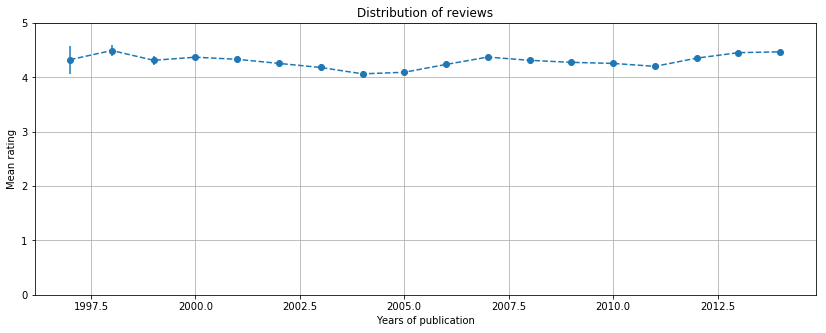

In [347]:
distribution = review_books_df.groupby(review_books_df['unixReviewTime'].apply(lambda x: x.year)).mean()

plt.figure(figsize=(14,5))
plt.errorbar(distribution.index.values, distribution['overall'].values, yerr=distribution_err.err.values, fmt='--o')
axes = plt.gca()
axes.set_ylim([0,5])
plt.title('Distribution of reviews')
plt.xlabel('Years of publication')
plt.ylabel('Mean rating')
plt.grid()
plt.show()

### Exemple pour le book 0470769327

Ce book représente "Feng shui for dummies".

In [114]:
books_df[books_df['isbn'] == '0470769327']

,title,description,imUrl,authors,isbn,eisbn,brand,edition,publisher
asin,,,,,,,,,
0470769327,feng shui for dummies,Packed with up-to-date practices to bring Feng...,http://ecx.images-amazon.com/images/I/515wjGHF...,[david daniel kennedy],0470769327,None,Brand: For Dummies,2nd Edition,John Wiley & Sons


#### Ses reviews 

In [128]:
len(review_books_df[review_books_df['asin'] == '0470769327'].sort_values(by='unixReviewTime'))

41

In [115]:
review_books_df[review_books_df['asin'] == '0470769327'].sort_values(by='unixReviewTime').head()

,asin,overall,unixReviewTime
6129374,0470769327,5.0,2011-02-12
6129360,0470769327,5.0,2011-03-12
6129372,0470769327,5.0,2011-03-17
6129344,0470769327,3.0,2011-03-17
6129351,0470769327,5.0,2011-03-22


La première review

In [120]:
review_books_df[review_books_df['asin'] == '0470769327'].sort_values(by='unixReviewTime').iloc[0]

asin                       0470769327
overall                             5
unixReviewTime    2011-02-12 00:00:00
Name: 6129374, dtype: object

La note de sa premiere review

In [121]:
review_books_df[review_books_df['asin'] == '0470769327'].sort_values(by='unixReviewTime').iloc[0].overall

5.0

Doit être classé **H**.

#### Ses livres similaires

In [124]:
very_similars['0470769327']

['0764552953']

1 seul livre est déclaré similaire.

In [129]:
books_df[books_df['isbn'] == '0764552953']

,title,description,imUrl,authors,isbn,eisbn,brand,edition,publisher
asin,,,,,,,,,
0764552953,feng shui for dummies,"Praises forFen Shui For Dummies""If you've ever...",http://ecx.images-amazon.com/images/I/51Hqibg6...,[david daniel kennedy],0764552953,None,Brand: For Dummies,None,"Hungry Minds Inc,U.S."


La première review de son livre similaire.

In [126]:
review_books_df[review_books_df['asin'] == '0764552953'].sort_values(by='unixReviewTime').iloc[0].overall

5.0

Doit être classé **H**. Et le couple **HH**.

__________________

## SalesRank and Review correlation analysis

Amazon itself doesn’t reveal exactly how the sales rank is calculated, which is why there are only theories and speculation surrounding the method. Sales volume alone is taken into consideration and not other figures such as number of reviews or retail price. In our analysis, we want to see if their is a statistic correlation between sales rank and reviews grade. 

### Comparison of books together

We use the books that are related to a similarity with an other one. In our analysis of books, we take the sales rank of books. 

In [300]:
meta_books_df = pd.read_pickle('../../Project-Data/dump/meta_Books_asin_title_salesRank_description_imUrl_ALL')

very_similar_ASIN = list(very_similars.keys())
very_similar_ASIN += [item for sublist in list(very_similars.values()) for item in sublist]

meta_books_df = meta_books_df[['asin', 'description', 'imUrl', 'salesRank_Books', 'title']].set_index('asin').loc[very_similar_ASIN]

meta_reviews_df = pd.read_pickle('../../Project-Data/dump/reviews_Books_asin_overall_unixReviewTime_ALL')

meta_books_df.shape

(1611, 4)

These 3 books are the best ranked of our dataframe. They have the smaller sales rank.

In [177]:
meta_books_df.sort_values(by='salesRank_Books').head(3)

,description,imUrl,salesRank_Books,title
asin,,,,
0385349947,"An Amazon Best Book of the Month, March 2013: ...",http://ecx.images-amazon.com/images/I/41TknOCI...,150.0,"Lean In: Women, Work, and the Will to Lead"
0761152121,It all started with a baby…and a book. Heidi M...,http://ecx.images-amazon.com/images/I/91bgE5v1...,222.0,"What to Expect the First Year, Second Edition"
1889140430,"""An excellent, workable, and supportive resour...",http://ecx.images-amazon.com/images/I/51mngzUN...,252.0,1-2-3 Magic: Effective Discipline for Children...


In [294]:
meta_reviews_df.head(3)

,asin,overall,unixReviewTime
0,0000000116,4.0,2002-04-27
1,0000000116,1.0,2014-03-24
2,0000000868,4.0,2002-09-11


We create the dataframe that we want for our analysis. The column are "asin", "salesRank", "review_avg" for the average of review grade for corresponding to the book, "review_std" for the standard deviation of reviews and "review_count" for the sum of reviews.

In [27]:
books_reviews = []

for i in range(len(meta_books_df)):
    asin = meta_books_df.iloc[i].name
    salesRank = meta_books_df.iloc[i].salesRank_Books
    review_avg = meta_reviews_df[meta_reviews_df['asin'] == meta_books_df.iloc[i].name].mean().overall
    review_std = meta_reviews_df[meta_reviews_df['asin'] == meta_books_df.iloc[i].name].std().overall
    review_count = meta_reviews_df[meta_reviews_df['asin'] == meta_books_df.iloc[i].name].count().overall

    books_reviews.append({
            'asin': asin,
            'salesRank': salesRank,
            'review_avg': review_avg,
            'review_std': review_std,
            'review_count': review_count,
        })
    

In [295]:
books_reviews_df = pd.DataFrame.from_dict(books_reviews)
books_reviews_df.sort_values(by='salesRank').head(3)

,asin,review_avg,review_count,review_std,salesRank
14,0385349947,4.338917,1791,1.062115,150.0
1494,0761152121,4.342365,406,1.101527,222.0
1300,1889140430,4.395770,331,1.116209,252.0


We plot our datas to see if we can observe trends.

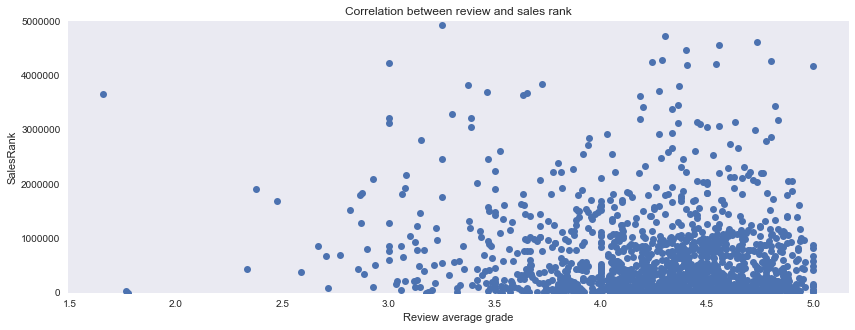

In [296]:
plt.figure(figsize=(14,5))
plt.plot(books_reviews_df.review_avg.values, books_reviews_df.salesRank.values, 'o')
axes = plt.gca()
axes.set_ylim([0,5000000])
plt.title('Correlation between review and sales rank')
plt.xlabel('Review average grade')
plt.ylabel('SalesRank')
plt.grid()
plt.show()

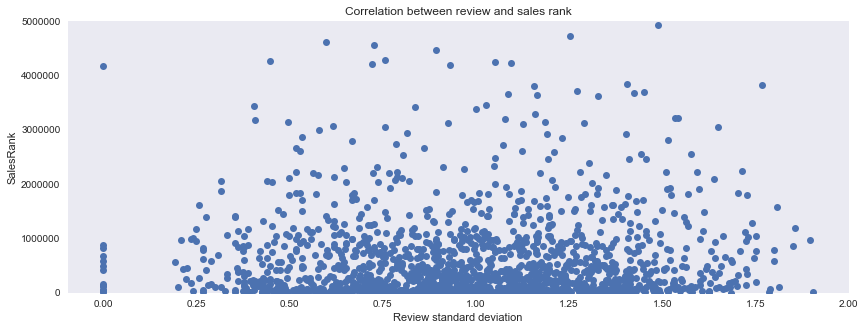

In [297]:
plt.figure(figsize=(14,5))
plt.plot(books_reviews_df.review_std.values, books_reviews_df.salesRank.values, 'o')
axes = plt.gca()
axes.set_ylim([0,5000000])
plt.title('Correlation between review and sales rank')
plt.xlabel('Review standard deviation')
plt.ylabel('SalesRank')
plt.grid()
plt.show()

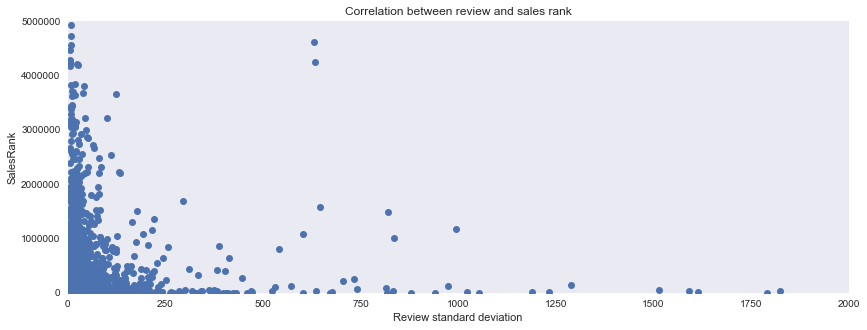

In [299]:
plt.figure(figsize=(14,5))
plt.plot(books_reviews_df.review_count.values, books_reviews_df.salesRank.values, 'o')
axes = plt.gca()
axes.set_ylim([0,5000000])
axes.set_xlim([0,2000])
plt.title('Correlation between review and sales rank')
plt.xlabel('Review standard deviation')
plt.ylabel('SalesRank')
plt.grid()
plt.show()

We see with these 3 plots that there is no correlation between review grade or review variance and sales rank. We se a correlation between review quantity and sales rank. Following these observations we can say that:
- a book which has bad reviews can have a good sales rank because many people have bought it at a given time. 
- a book which has a big standard deviation representing a big difference between reviews can have a good sales rank.
- a book which has a lot of reviews is more likely to have a good sales rank. As more sales mean more review, more review involve more sales. 

To have a better view of the impacts of sales rank, we decide to use our work on book similarity. We want to compare the books sales rank of two similar books and see how reviews may influence that difference. 

### Comparison inside book similarities

Now we want to see if a two similar books with different sales rank have different reviews characteristics.

In [301]:
books_reviews_df.head(3)

,asin,review_avg,review_count,review_std,salesRank
0,0470769327,4.341463,41,0.964618,36163.0
1,0767903927,4.652174,23,1.152416,853517.0
2,0240802756,4.734043,188,0.696447,437123.0


First, we take the books that are similar. Then we compute the difference in term of sales rank, review average, review quantity and review standard deviation.

In [266]:
books_salesrank_reviews_diff = []

for i in range(len(very_similars)-1):
    similars = very_similars[books_reviews_df.iloc[i].asin]
    
    for s in similars:
        book_similar = books_reviews_df[books_reviews_df['asin'] == s]

        diff_salesrank = abs(books_reviews_df.iloc[i].salesRank - book_similar.salesRank.values[0])
        diff_review_avg = abs(books_reviews_df.iloc[i].review_avg - book_similar.review_avg.values[0])
        diff_review_count = abs(books_reviews_df.iloc[i].review_count - book_similar.review_count.values[0])
        diff_review_std = abs(books_reviews_df.iloc[i].review_std - book_similar.review_std.values[0])
        
        books_salesrank_reviews_diff.append({
            'diff_salesrank': diff_salesrank,
            'diff_review_avg': diff_review_avg,
            'diff_review_count': diff_review_count,
            'diff_review_std': diff_review_std,
        })

In [303]:
books_salesrank_reviews_diff_df = pd.DataFrame.from_dict(books_salesrank_reviews_diff)
books_salesrank_reviews_diff_df.sort_values(by='diff_salesrank', ascending=False).head(3)

,diff_review_avg,diff_review_count,diff_review_std,diff_salesrank
417,0.412736,98,0.490036,14419368.0
582,0.160000,57,0.210406,11358901.0
499,0.025906,83,0.008508,8628536.0


To have a better understanding in our visualization, we decide to descretize our values and create a heatmap.

In [311]:
cut_diff_salesrank = np.linspace(0, 8.126680e+05, num=10)
cut_diff_review_avg = np.linspace(0, 2.955122, num=30)

books_salesrank_reviews_diff_df['Salesrank_difference'] = pd.cut(books_salesrank_reviews_diff_df['diff_salesrank'], cut_diff_salesrank)
books_salesrank_reviews_diff_df['Review_average_difference'] = pd.cut(books_salesrank_reviews_diff_df['diff_review_avg'], cut_diff_review_avg)

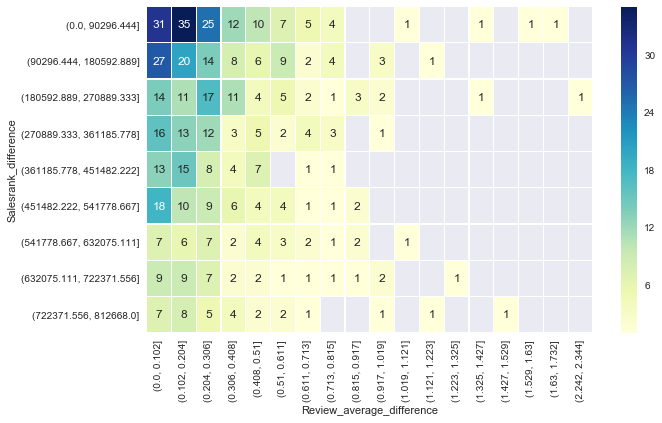

In [312]:
heat_map = books_salesrank_reviews_diff_df.pivot_table(index='Salesrank_difference', columns='Review_average_difference', values='diff_review_count', aggfunc=lambda x: len(x.unique()))
sns.set()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heat_map, annot=True, linewidths=0.1, ax=ax, cmap="YlGnBu")

An interesting information from this heatmap is that most of the big sales rank differences are for books who have small review difference. 
- Example: 2 books who have a difference of around 500'000 positions in the sales rank have a good probability to have a review average difference around 0.102.

## Price and Review correlation analysis

As we cover the sales rank correlation analysis with reviews, we perform an analysis about book prices. 

### Comparison of books together

We decide this time to take a part of all the dataset to perform our analysis between books together. 

In [55]:
%matplotlib inline
# To reload external scripts automatically
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys

# Importing external files
sys.path.append('scripts/')
from data_import import *
from similarities import *
from utils import *
from amazon_api_interaction import *

pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
DATA_FOLDER = "../../Project-Data/"
META_FOLDER = DATA_FOLDER + "meta/"
REVIEWS_FOLDER = DATA_FOLDER + "reviews/"
CORE_FOLDER = DATA_FOLDER + "5_core/"
DUMP_FOLDER = DATA_FOLDER + "dump/"
CATEGORIES = ['Books','Movies_and_Tv','Electronics']
MAXCOUNT = -1

In [57]:
meta_books_path, review_books_path, core_book_path = get_paths(0, DATA_FOLDER, META_FOLDER,CORE_FOLDER,REVIEWS_FOLDER, CATEGORIES)

Paths : 
	 meta = ../../Project-Data/meta/meta_Books.json
	 review = ../../Project-Data/reviews/reviews_Books.json
	 core_path = ../../Project-Data/5_core/Books.json


Metadata books

In [58]:
meta_books = import_interesting_cols(meta_books_path,DUMP_FOLDER,True,[],max_count=MAXCOUNT)

Retrieving from : ../../Project-Data/dump/meta_Books__ALL
It took 00:00:33.974 to import the data.


In [61]:
meta_books.head(1)

,asin,brand,categories,description,imUrl,price,related,"salesRank_Arts,_Crafts_&_Sewing",salesRank_Books,salesRank_Cell_Phones_&_Accessories,...,salesRank_Jewelry,salesRank_Kitchen_&_Dining,salesRank_Movies_&_TV,salesRank_Music,salesRank_Musical_Instruments,salesRank_Office_Products,salesRank_Shoes,salesRank_Sports_&_Outdoors,salesRank_Toys_&_Games,title
0,0001048791,NaN,[Books],NaN,http://ecx.images-amazon.com/images/I/51MKP0T4...,NaN,NaN,NaN,6334800.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Crucible: Performed by Stuart Pankin, Jero..."


In [62]:
list(meta_books)

['asin',
 'brand',
 'categories',
 'description',
 'imUrl',
 'price',
 'related',
 'salesRank_Arts,_Crafts_&_Sewing',
 'salesRank_Books',
 'salesRank_Cell_Phones_&_Accessories',
 'salesRank_Clothing',
 'salesRank_Electronics',
 'salesRank_Health_&_Personal_Care',
 'salesRank_Home_&_Kitchen',
 'salesRank_Industrial_&_Scientific',
 'salesRank_Jewelry',
 'salesRank_Kitchen_&_Dining',
 'salesRank_Movies_&_TV',
 'salesRank_Music',
 'salesRank_Musical_Instruments',
 'salesRank_Office_Products',
 'salesRank_Shoes',
 'salesRank_Sports_&_Outdoors',
 'salesRank_Toys_&_Games',
 'title']

In [63]:
meta_books.shape

(2370585, 25)

We want to know if there is a correlation between book price and reviews. For the reviews, we will use the average, the standard deviation and the quantity for each book. 

We see that the price is not available for each books. We will not use books without price for our analysis. We create the dataframe that we want for our analysis with column are "asin", "price", "review_avg", "review_std", "review_count".

In [108]:
books_price_reviews = []

for i in range(1):
    if not np.isnan(meta_books.iloc[i].price):  

        if meta_books.iloc[i].asin in books_reviews_df.asin:
            review_avg = books_reviews_df['review_avg']
            review_std = books_reviews_df['review_std']
            review_count = books_reviews_df['review_count']
            asin = books_reviews_df['asin']
            price = meta_books.iloc[i].price
        else:
            review_avg = meta_reviews_df[meta_reviews_df['asin'] == meta_books.iloc[i].asin].mean().overall
            review_std = meta_reviews_df[meta_reviews_df['asin'] == meta_books.iloc[i].asin].std().overall
            review_count = meta_reviews_df[meta_reviews_df['asin'] == meta_books.iloc[i].asin].count().overall
            asin = meta_books.iloc[i].asin
            price = meta_books.iloc[i].price
            
        books_price_reviews.append({
            'asin': asin,
            'price': price,
            'review_avg': review_avg,
            'review_std': review_std,
            'review_count': review_count,
        })
    

KeyboardInterrupt: 

This are the 3 most expensives books from our selection.

In [314]:
books_price_reviews_df = pd.DataFrame.from_dict(books_price_reviews)
books_price_reviews_df.sort_values(by='price',ascending=False).head(3)

,asin,price,review_avg,review_count,review_std
4689,0028972252,673.92,4.5,2,0.707107
4587,0028658310,637.45,5.0,1,NaN
4613,002865806X,620.35,5.0,1,NaN


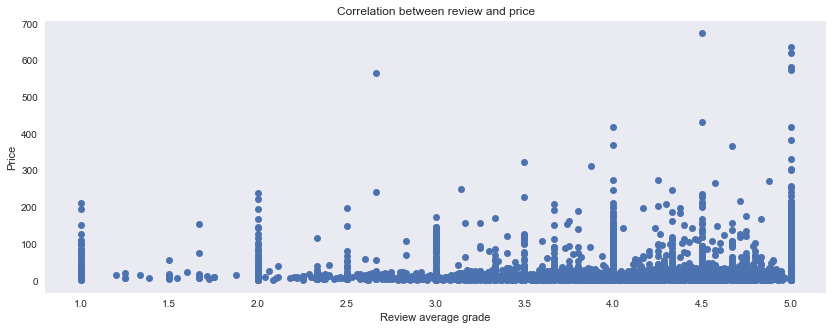

In [315]:
plt.figure(figsize=(14,5))
plt.plot(books_price_reviews_df.review_avg.values, books_price_reviews_df.price.values, 'o')
axes = plt.gca()
plt.title('Correlation between review and price')
plt.xlabel('Review average grade')
plt.ylabel('Price')
plt.grid()
plt.show()

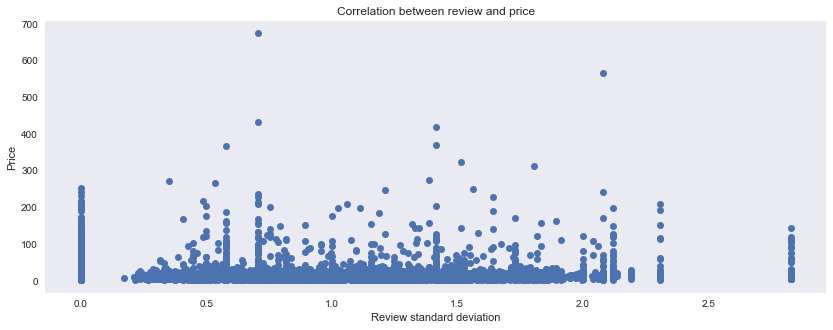

In [317]:
plt.figure(figsize=(14,5))
plt.plot(books_price_reviews_df.review_std.values, books_price_reviews_df.price.values, 'o')
axes = plt.gca()
plt.title('Correlation between review and price')
plt.xlabel('Review standard deviation')
plt.ylabel('Price')
plt.grid()
plt.show()

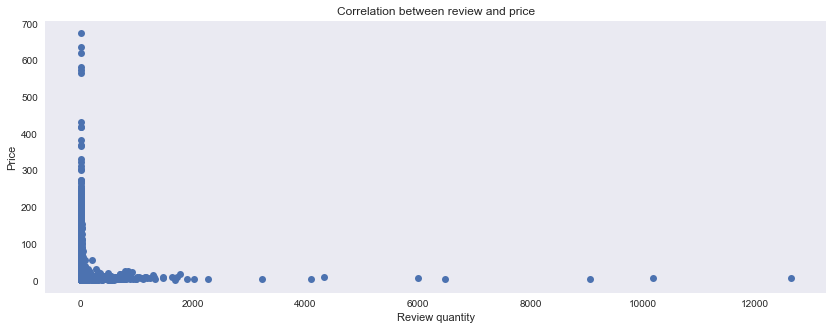

In [316]:
plt.figure(figsize=(14,5))
plt.plot(books_price_reviews_df.review_count.values, books_price_reviews_df.price.values, 'o')
axes = plt.gca()
plt.title('Correlation between review and price')
plt.xlabel('Review quantity')
plt.ylabel('Price')
plt.grid()
plt.show()

We observe these 3 plots and see if we can se correlation between review and price. Following these observations we can say that:
- even if we see a small trend to say that an expensive book lead to good review, this trend is not enough to conclude a correlation between review average grade and price.
- a book which has a big standard deviation in its reviews, representing a big difference between reviews can be cheap or expensive.
- a book which has a lot of reviews is more likely to have a low price. This is linked to the sales rank explored before. A low price lead a better sales rank and then more reviews. 

To have a better view of the impacts of price, we decide to use our work on book similarity. We want to compare the books price of two similar books and see how reviews may influence that difference. 

### Comparison inside book similarities

Now we want to see if a two similar books with different price have different reviews characteristics.

In [319]:
meta_books.shape # All database of books

(2370585, 25)

In [320]:
books_reviews_df.shape # Books that have similarities 

(1611, 5)

First, we take the books that are similar. Then we compute the difference in term of price normalized, review average, review quantity and review standard deviation.

In [358]:
books_price_reviews_diff = []

for i in range(len(very_similars)-1):
    similars = very_similars[books_reviews_df.iloc[i].asin]
    
    for s in similars:
        book_similar = books_reviews_df[books_reviews_df['asin'] == s]

        diff_price = (meta_books[meta_books['asin'] == books_reviews_df.iloc[i].asin].price.values[0] - meta_books[meta_books['asin'] == book_similar.asin.values[0]].price.values[0])/meta_books[meta_books['asin'] == book_similar.asin.values[0]].price.values[0]
        
        diff_review_avg = abs(books_reviews_df.iloc[i].review_avg - book_similar.review_avg.values[0])
        diff_review_count = abs(books_reviews_df.iloc[i].review_count - book_similar.review_count.values[0])
        diff_review_std = abs(books_reviews_df.iloc[i].review_std - book_similar.review_std.values[0])
        
        books_price_reviews_diff.append({
            'diff_price': diff_price,
            'diff_review_avg': diff_review_avg,
            'diff_review_count': diff_review_count,
            'diff_review_std': diff_review_std,
        })

In [369]:
books_price_reviews_diff_df = pd.DataFrame.from_dict(books_price_reviews_diff)
books_price_reviews_diff_df.head(3)

,diff_price,diff_review_avg,diff_review_count,diff_review_std
0,-0.309673,0.444028,2,0.482609
1,-0.014155,0.332174,2,0.062765
2,0.520494,0.057572,86,0.149765


The difference of price is normalized. For example, the first row represent 31% of difference between the 2 book prices. To have a better understanding in our visualization, we decide to descretize our values and create a heatmap.

In [375]:
cut_diff_price = np.linspace(-1, 8, num=40)
cut_diff_review_avg = np.linspace(0, 2.955122, num=30)

books_price_reviews_diff_df['Price_difference'] = pd.cut(books_price_reviews_diff_df['diff_price'], cut_diff_price)
books_price_reviews_diff_df['Review_average_difference'] = pd.cut(books_price_reviews_diff_df['diff_review_avg'], cut_diff_review_avg)

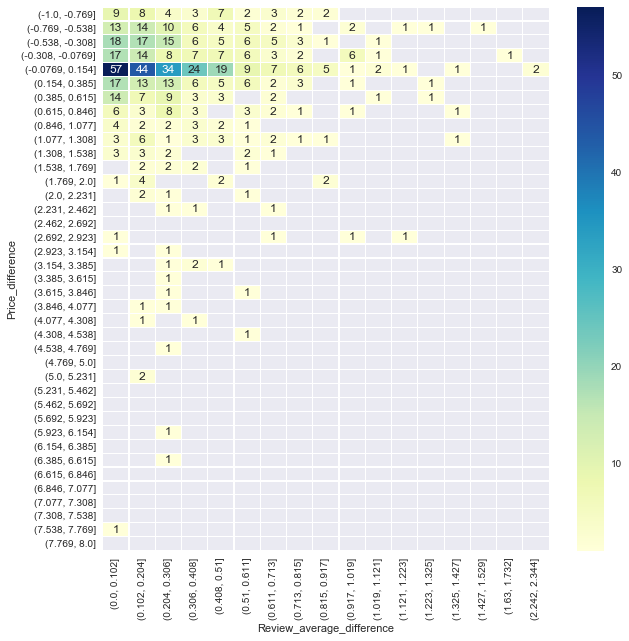

In [376]:
heat_map = books_price_reviews_diff_df.pivot_table(index='Price_difference', columns='Review_average_difference', values='diff_review_count', aggfunc=lambda x: len(x.unique()))
sns.set()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heat_map, annot=True, linewidths=0.1, ax=ax, cmap="YlGnBu")

From this heatmap, we see that some similar books have a big price difference without having a lot of difference in the average review rating. 
- Example: 18 similar books who have a price difference around 40% have almost same average reviews grade. 

#### Pickle of our dataframes

In [385]:
ANALYSIS_DATA_FOLDER = 'analysis_data/'

books_price_reviews_df.to_pickle(ANALYSIS_DATA_FOLDER + 'books_price_reviews')
books_price_reviews_diff_df.to_pickle(ANALYSIS_DATA_FOLDER + 'books_price_reviews_diff')

In [386]:
books_reviews_df.to_pickle(ANALYSIS_DATA_FOLDER + 'books_reviews_df')
